In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\moham\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Data Preparation**

In [2]:
df = pd.read_csv('D:/Data/UK_foods.csv',index_col='Unnamed: 0')

In [3]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [4]:
df=df.transpose()

<AxesSubplot:>

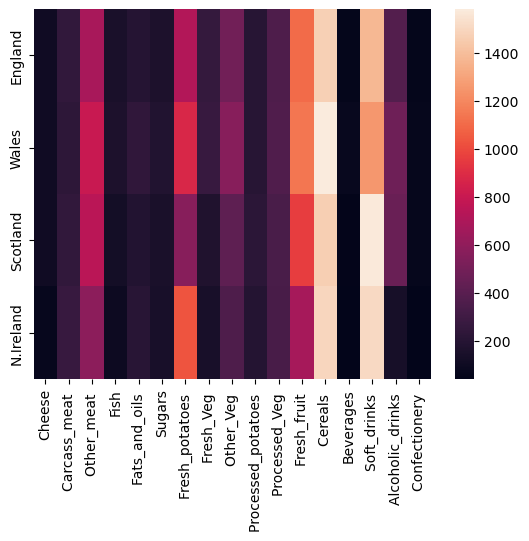

In [5]:
sns.heatmap(df)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [7]:
scaled_data=scaler.fit_transform(df)

**Training an Autoencoder**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [9]:
encoder=Sequential()
encoder.add(Dense(units=8, activation='relu', input_shape=[17]))
encoder.add(Dense(units=4, activation='relu', input_shape=[8]))
encoder.add(Dense(units=2, activation='relu', input_shape=[4]))

C:\Users\moham\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
decoder=Sequential()
decoder.add(Dense(units=4, activation='relu', input_shape=[2]))
decoder.add(Dense(units=8, activation='relu', input_shape=[4]))
decoder.add(Dense(units=17, activation='relu', input_shape=[8]))

In [11]:
autoencoder=Sequential([encoder,decoder])

In [12]:
sgd_optimizer = SGD(learning_rate=1.5)

In [13]:
autoencoder.compile(loss='mse',optimizer=sgd_optimizer)

In [14]:
scaled_data.shape

(4, 17)

In [15]:
type(scaled_data)

numpy.ndarray

In [16]:
autoencoder.fit(scaled_data,scaled_data, epochs=15)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 0.4168
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2915
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2495
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2672
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2380
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2969
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2171
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2171
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2369
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2244
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2738
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2089
Epoch 13/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2077
Epoch 14/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2140
Epoch 15/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2229


**Dimension Reduction**

In [17]:
encoded_2dim=encoder.predict(scaled_data)
encoded_2dim

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.92474467, 0.45856032],
       [1.6725348 , 0.86120915],
       [0.18750848, 0.08531275],
       [0.        , 0.01324501]], dtype=float32)

**Showing Results**

In [18]:
df_2=pd.DataFrame(encoded_2dim, columns=['C1','C2'], index=df.index)

In [19]:
df_2=df_2.reset_index()

<AxesSubplot:xlabel='C1', ylabel='C2'>

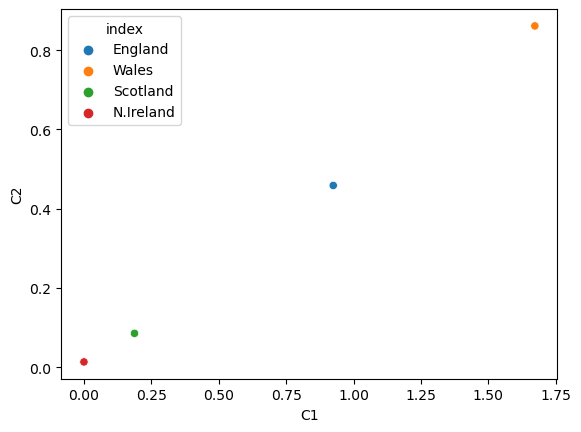

In [20]:
sns.scatterplot(data=df_2, x='C1', y='C2', hue='index')